### Nama : Rohmat
### NIM  : 211351131
### Kelas : TIF Pagi B

# Menghubungkan Ke kaggle dan Datasets

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rohmatif","key":"f14538077a6cda2bc2b9cc0bf0fabc0f"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
! kaggle datasets download -d krishnendujana2/mobile-price

  0% 0.00/35.1k [00:00<?, ?B/s]
100% 35.1k/35.1k [00:00<00:00, 61.5MB/s]


# Unziping Dataset

In [5]:
! mkdir mobile-price
! unzip mobile-price.zip -d mobile-price
! ls mobile-phone-specifications-and-prices

Archive:  mobile-price.zip
  inflating: mobile-price/mobilepricedata.csv  
ls: cannot access 'mobile-phone-specifications-and-prices': No such file or directory


# Mengimpor Liblary

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [7]:
df = pd.read_csv('/content/mobile-price/mobilepricedata.csv')

In [8]:
df.head()

,Name,Brand_Name,Processor,BrandCategory,ProcessorCategory,Rating,Numbe_of_Ratings,Number_of_Reviews,RAM,ROM,Diplay_Size,Back_Camera,Front_Camera,Battery,Price,Price_Range
0,"Redmi Note 4 (Black, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
1,"Redmi Note 4 (Dark Grey, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
2,"Redmi Note 4 (Gold, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
3,"Redmi Note 4 (Lake Blue, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
4,"Redmi 5A (Blue, 16 GB)",Redmi,Snapdragon,10,5,4.5,1232827.0,151035.0,2,16,5.0,13.0,5.0,3000,5999,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2190 non-null   object 
 1   Brand_Name         2190 non-null   object 
 2   Processor          2190 non-null   object 
 3   BrandCategory      2190 non-null   int64  
 4   ProcessorCategory  2190 non-null   int64  
 5   Rating             2190 non-null   float64
 6   Numbe_of_Ratings   2190 non-null   float64
 7   Number_of_Reviews  2190 non-null   float64
 8   RAM                2190 non-null   int64  
 9   ROM                2190 non-null   int64  
 10  Diplay_Size        2190 non-null   float64
 11  Back_Camera        2190 non-null   float64
 12  Front_Camera       2190 non-null   float64
 13  Battery            2190 non-null   int64  
 14  Price              2190 non-null   int64  
 15  Price_Range        2190 non-null   int64  
dtypes: float64(6), int64(7),

In [10]:
df.describe()

,BrandCategory,ProcessorCategory,Rating,Numbe_of_Ratings,Number_of_Reviews,RAM,ROM,Diplay_Size,Back_Camera,Front_Camera,Battery,Price,Price_Range
count,2190.000000,2190.000000,2190.000000,2.190000e+03,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,6.730137,3.794977,4.295616,6.052867e+04,6110.451598,5.284475,121.830137,6.310909,35.673333,13.154658,4398.985845,30720.330137,3.047489
std,4.291647,1.757441,0.216410,1.453341e+05,17316.110440,2.517347,128.414154,0.526058,29.011108,13.528538,982.393107,32037.761347,2.780952
min,0.000000,0.000000,2.900000,3.000000e+00,0.000000,1.000000,2.000000,0.100000,5.000000,0.000000,1200.000000,5299.000000,0.000000
25%,3.000000,4.000000,4.200000,1.241000e+03,102.000000,4.000000,64.000000,6.150000,12.000000,5.000000,4000.000000,11499.000000,1.000000
50%,7.000000,4.000000,4.300000,7.684000e+03,680.500000,4.000000,128.000000,6.500000,16.000000,12.000000,4605.000000,17999.000000,2.000000
75%,10.000000,5.000000,4.400000,4.610175e+04,4169.000000,8.000000,128.000000,6.600000,50.000000,16.000000,5000.000000,34742.250000,5.000000
max,13.000000,6.000000,4.800000,1.341712e+06,211542.000000,18.000000,1024.000000,7.600000,200.000000,200.000000,7000.000000,189999.000000,8.000000


In [11]:
x =df.drop(['Name','Brand_Name','Processor','Price_Range'],axis = 1)
y = df.Price_Range
x.head(5)

,BrandCategory,ProcessorCategory,Rating,Numbe_of_Ratings,Number_of_Reviews,RAM,ROM,Diplay_Size,Back_Camera,Front_Camera,Battery,Price
0,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749
1,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749
2,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749
3,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749
4,10,5,4.5,1232827.0,151035.0,2,16,5.0,13.0,5.0,3000,5999


In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BrandCategory      2190 non-null   int64  
 1   ProcessorCategory  2190 non-null   int64  
 2   Rating             2190 non-null   float64
 3   Numbe_of_Ratings   2190 non-null   float64
 4   Number_of_Reviews  2190 non-null   float64
 5   RAM                2190 non-null   int64  
 6   ROM                2190 non-null   int64  
 7   Diplay_Size        2190 non-null   float64
 8   Back_Camera        2190 non-null   float64
 9   Front_Camera       2190 non-null   float64
 10  Battery            2190 non-null   int64  
 11  Price              2190 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 205.4 KB


In [13]:
df[df.duplicated()]

,Name,Brand_Name,Processor,BrandCategory,ProcessorCategory,Rating,Numbe_of_Ratings,Number_of_Reviews,RAM,ROM,Diplay_Size,Back_Camera,Front_Camera,Battery,Price,Price_Range
230,"APPLE iPhone 12 (Blue, 128 GB)",Apple,Apple,0,0,4.6,187913.0,12791.0,4,128,6.1,12.0,12.0,2816,56999,7
240,"APPLE iPhone 12 (Red, 256 GB)",Apple,Apple,0,0,4.6,187913.0,12791.0,4,256,6.1,12.0,12.0,2816,66999,8


# Visualisasi Data

<Axes: >

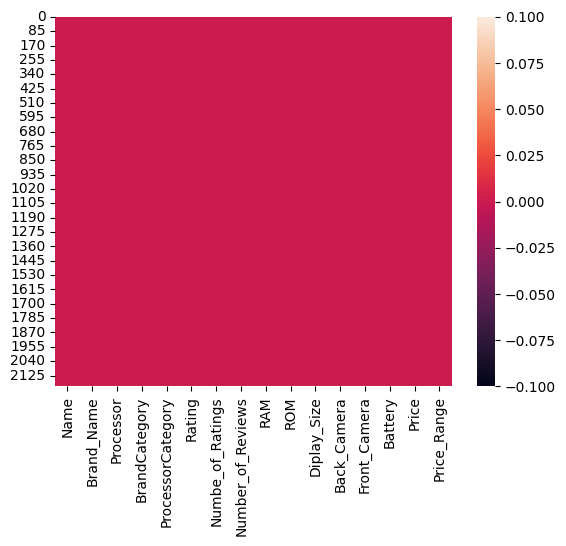

In [14]:
sns.heatmap(df.isnull())

<ipython-input-15-30bef3b85173>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

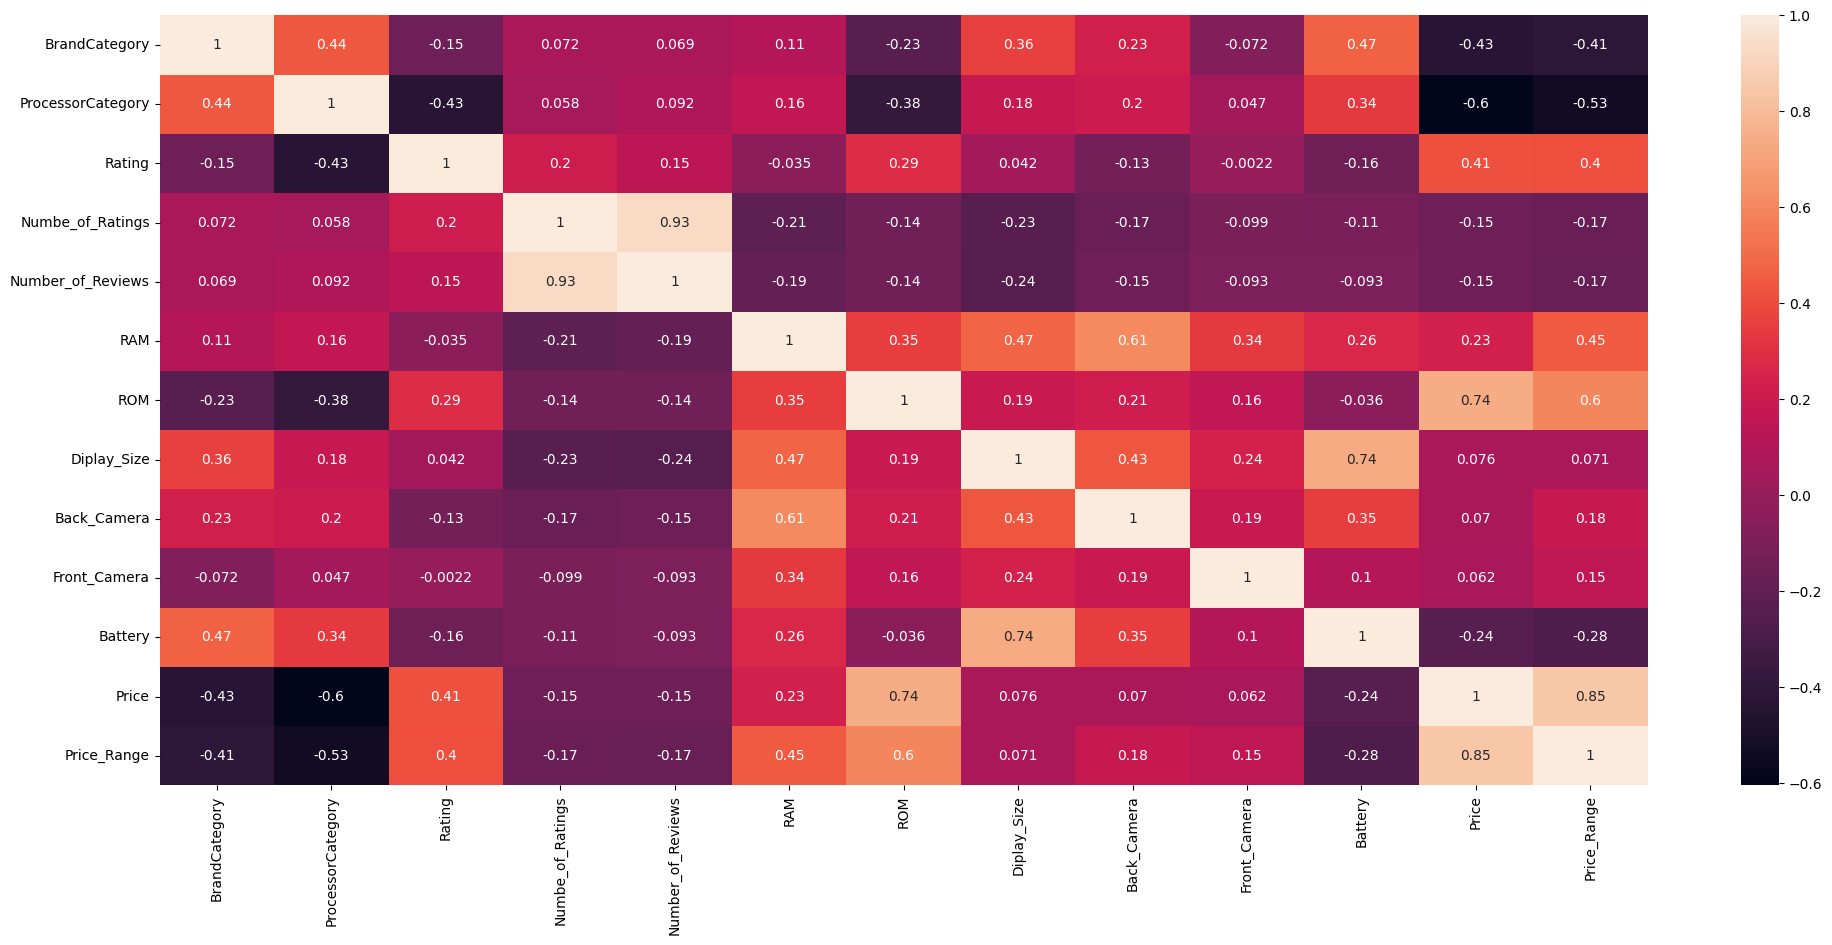

In [15]:
plt.figure(figsize=(24,10))
sns.heatmap(df.corr(),annot=True)

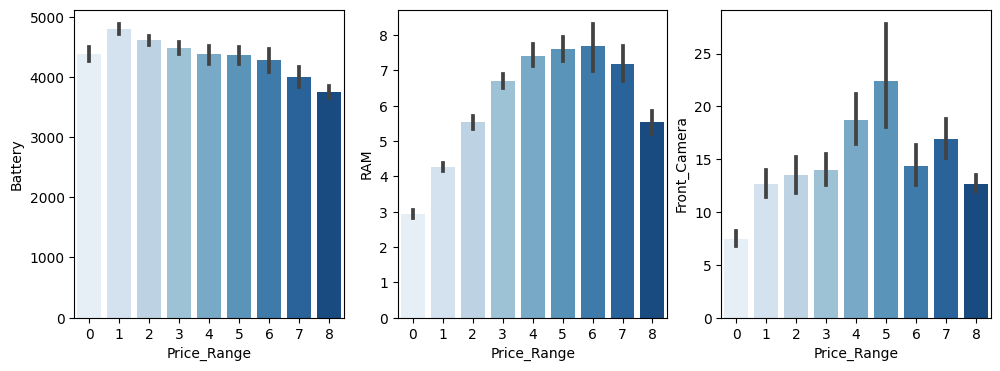

In [16]:
plt.figure(figsize = (16,4))
plt.subplot(1,4,1)
sns.barplot(x = 'Price_Range', y = 'Battery', data = df, palette = 'Blues')
plt.subplot(1,4,2)
sns.barplot(x = 'Price_Range', y = 'RAM',data = df, palette = 'Blues')
plt.subplot(1,4,3)
sns.barplot(x = 'Price_Range', y = 'Front_Camera', data = df, palette = 'Blues')
plt.show()

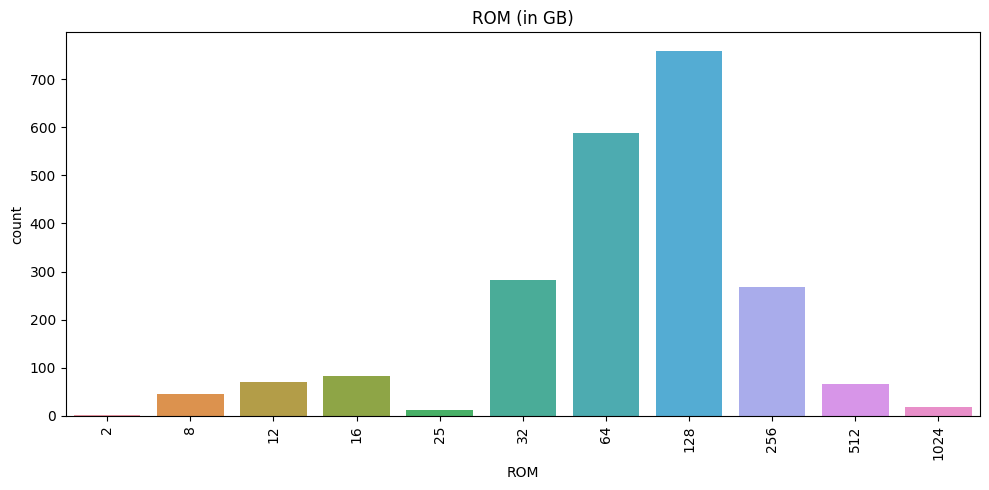

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['ROM'])
plt.xticks(rotation = 90)
plt.title("ROM (in GB)")
plt.tight_layout()

# Modeling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
features = ['BrandCategory','ProcessorCategory','RAM','ROM','Battery','Diplay_Size','Back_Camera','Front_Camera']
x = df[features]
y = df['Price']
x.shape, y.shape

((2190, 8), (2190,))

In [33]:
x_train, X_test, y_train, y_test = train_test_split(x, y, random_state=70)

In [34]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [35]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linear =', score)

akurasi model regresi linear = 0.7466557871908398


# Evalution

In [30]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)

print(f"precision = {score}")

precision = 0.7466557871908398


# Coba Menginput Data

In [31]:
#'BrandCategory','ProcessorCategory','RAM','ROM','Battery','Diplay_Size','Back_Camera','Front_Camera'
input_data = np.array([[10,5,4,64,4100,550,13,5]])

prediction = lr.predict(input_data)
print('Estimasi harga smartphone dalam EUR :', prediction)

Estimasi harga smartphone dalam EUR : [9621521.79284554]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
import pickle

filename = 'estimasi_Mobile_2023.sav'
pickle.dump(lr,open(filename,'wb'))